                 Neighborhood  Incidents     Rating
0                   St. Clair          1  99.489796
1             Mt. Oliver Boro          1  99.489796
2               New Homestead          1  99.489796
3              Outside County          1  99.489796
4               East Carnegie          2  98.979592
..                        ...        ...        ...
89             Homewood South         75  61.734694
90        Squirrel Hill South         77  60.714286
91                    Carrick        105  46.428571
92           South Side Flats        109  44.387755
93  Central Business District        196   0.000000

[94 rows x 3 columns]


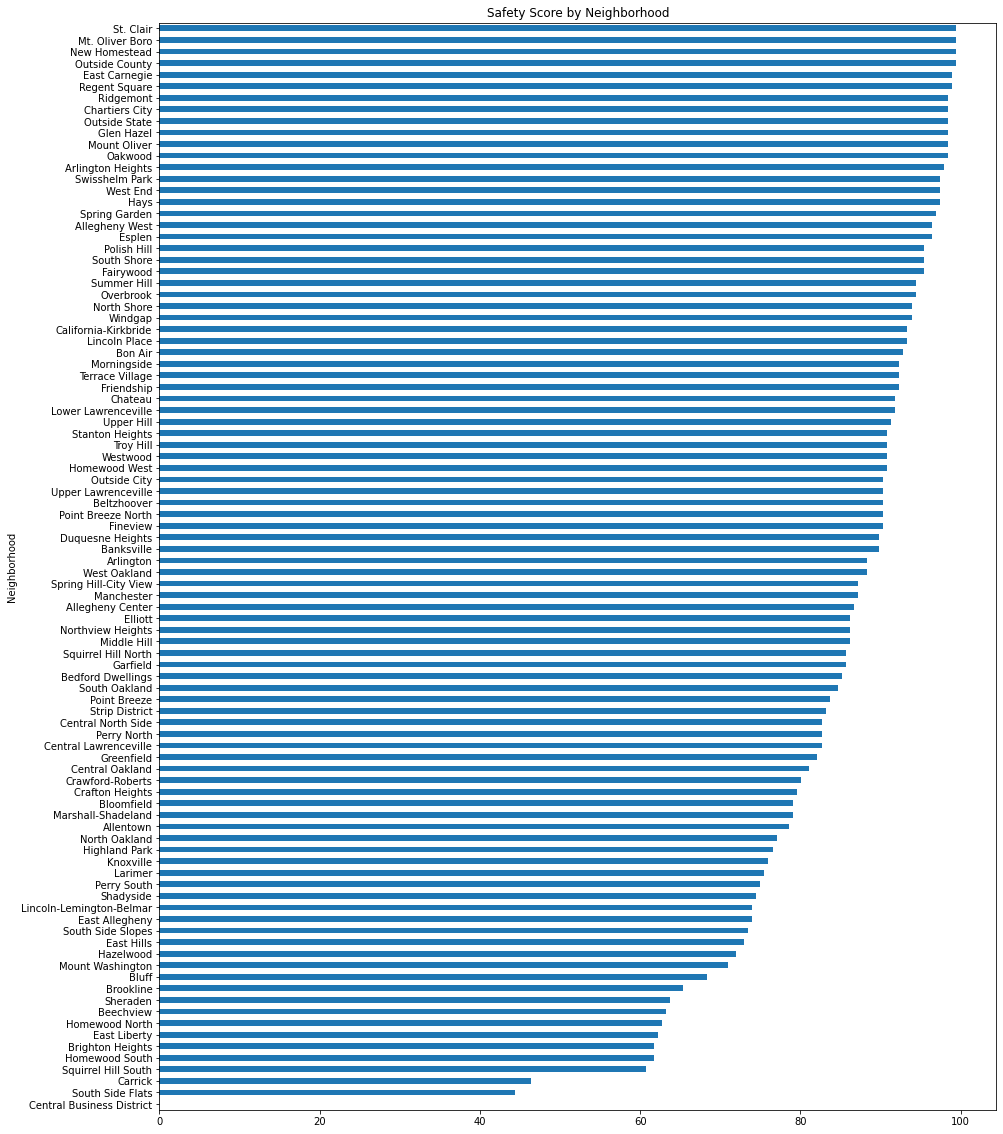

In [2]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


# Parse CSV file
blotter_pandas = pd.read_csv("https://data.wprdc.org/datastore/dump/1797ead8-8262-41cc-9099-cbc8a161924b")

# Set default values for max and min incidents
min = 50
max = 50

# Create a new dictionary to populate with neighborhoods/incident counts
new_dict = {}

for i in range(len(blotter_pandas.index)):
# Check if neighborhood is not nan
    if pd.notna(blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]):
# Check if neighborhood is already in dict, increment incidents if so, set to 1 if not
        if blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"] in new_dict:
            new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]] += 1
        else:
            new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]] = 1
            
# Check if new neighborhood incident count is fewer than min or greater than max and set values if so
        if new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]] < min:
            min = new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]]
        if new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]] > max:
            max = new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]]

# Create new lists for each of the three dataframe columns
colOne = []
colTwo = []
colThree = []

for i in new_dict:
# Iterate through the dictionary and populate each list with the appropriate data
    colOne.append(i)
    colTwo.append(new_dict[i])
# This line calculates Safety Score based on the given neighborhood's incident count and the maximum incident count
    colThree.append(100 - (100 * (new_dict[i] / max)))

# Generate data with column names and lists
data = {'Neighborhood': colOne,
        'Incidents': colTwo,
        'Rating': colThree
        }

# Create dataframe, sort rows by Safety Score descending, then reset the index
dataframe = pd.DataFrame(data)
dataframe = dataframe.sort_values(by=['Rating'], ascending=False)
dataframe = dataframe.reset_index(drop=True)

# Rating dataframe
cheet = {"Neighborhood": dataframe.loc[:, "Neighborhood"] , "Rating": dataframe.loc[:, "Rating"]}
gfg = pd.DataFrame(cheet)
gfg = gfg.set_index('Neighborhood')


# Print the dataframe contents and plot the pertinent data
print(dataframe)
dataframe.loc[:, ['Neighborhood', 'Rating']].plot(kind='barh', figsize=(15,20), x='Neighborhood', title='Safety Score by Neighborhood', legend=False).invert_yaxis()

68.9
{'Rating': Neighborhood
Squirrel Hill            100.000000
Hill                      83.309144
Perry North               52.249637
Highland Park             52.104499
Shadyside                 49.201742
Homewood                  47.605225
Regent Square             45.573295
Central Lawrenceville     38.606676
East Allegheny            37.735849
Oakland                   36.865022
Manchester                30.478955
Friendship                29.898403
Lower Lawrenceville       28.592163
Garfield                  26.124819
Morning Side              24.528302
Elliott                   20.609579
Carrick                   12.772134
South Hills               12.336720
Point Breeze              12.336720
Mt. Washington            10.449927
Beechview                  9.288824
Knoxville                  7.547170
Summerset                  7.256894
Beltzhoover                0.000000
Brookline                  0.000000
Name: Rating, dtype: float64}


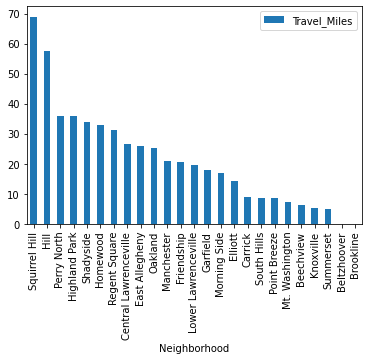

In [43]:
# Street Sweep Dataset
#Access Data Frane
street = pd.read_csv("https://data.wprdc.org/dataset/b882ba13-b01b-4a8e-a29f-5b2c0ef73566/resource/a5f3ae45-0716-4652-a85c-a69424f2f4f7/download/routestable.csv", index_col="Route Description", dtype={"id": int})

#Splice through the Travel Miles and add to my own data frame
streets = {"Travel_Miles": street.loc[:, "Travel Miles"]}
che = pd.DataFrame(streets)

#Group together Routes 
che = che.groupby("Route Description").sum()
ches = che.groupby(che.index.str.split().str[0]).Travel_Miles.sum().reset_index()

#Remaned Route Description to Neighborhood in Data Frame
ches2 = ches.rename({'Route Description': 'Neighborhood'}, axis=1)

#Editted names in Neighborhood index
ches3 =ches2.set_index('Neighborhood')
ches3.rename(index={"Central":'Central Lawrenceville',"East":'East Allegheny', "Elliott,": "Elliott", "Highland": "Highland Park", "Lower": "Lower Lawrenceville", "Morning": "Morning Side", "Mt": "Mt. Washington", "Perry": "Perry North", "Point": "Point Breeze", "Regent": "Regent Square", "South": "South Hills", "Squirrel": "Squirrel Hill"}, inplace=True)


# Visualization here
ches3 = ches3.sort_values(by=['Travel_Miles'], ascending=False)
ches3.plot(kind="bar")

# Metric Part 1...
# Find the max of data set...
column = ches3["Travel_Miles"]
max_value = column.max()
print(max_value)

# Metric Part 2...  
# create a new column and solve for rating...
ches3['Rating'] = ((ches3["Travel_Miles"] * 100).div(max_value))
cheetos = {"Rating": ches3.loc[:, "Rating"]}
fg = pd.DataFrame(cheetos)


print(cheetos)

/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Quantity    5073
dtype: int64
                     Quantity      Rating
Neighborhood                             
Squirrel Hill South      5073  100.000000
Highland Park            2941   57.973586
Squirrel Hill North      2083   41.060516
South Side Flats         1693   33.372758
Shadyside                1558   30.711610
...                       ...         ...
Arlington Heights           5    0.098561
Esplen                      3    0.059137
Glen Hazel                  2    0.039424
South Shore                 2    0.039424
Hays                        1    0.019712

[90 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


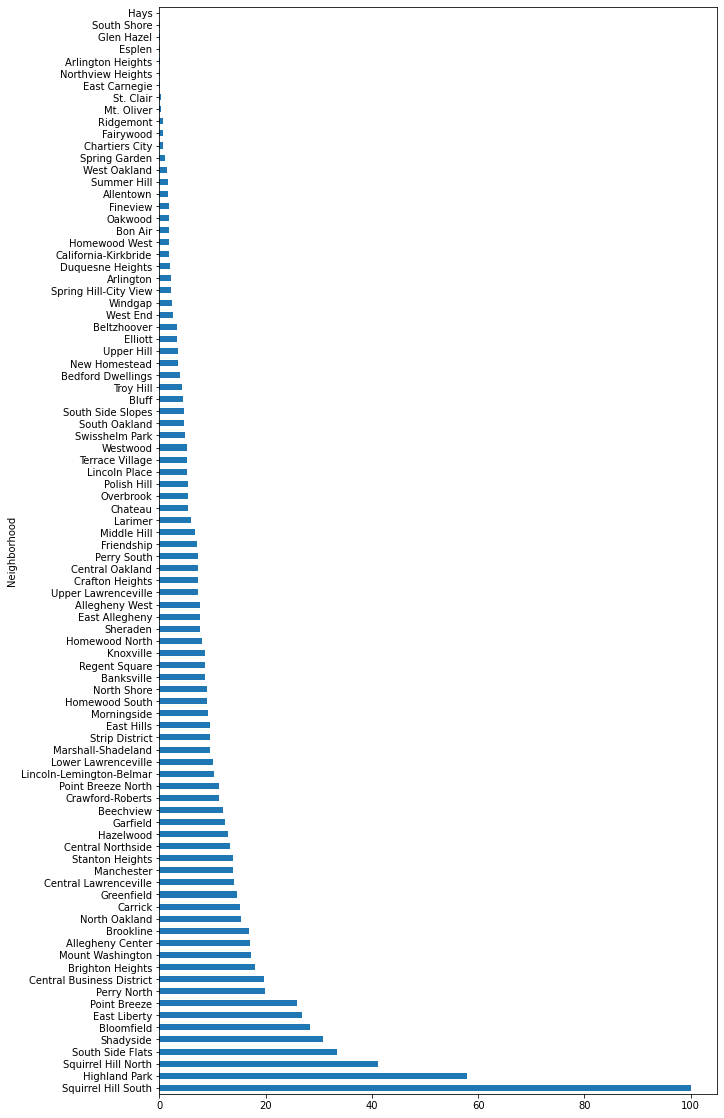

In [38]:
# Tree Dataset 
pittsTree = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da", index_col="id", dtype={"id": int})

Quantity = []

trees = {"Neighborhood": pittsTree.loc[:, "neighborhood"]}
df = pd.DataFrame(trees)

for value in df["Neighborhood"]:
    Quantity.append(1)

df["Quantity"] = Quantity

cheese = df.groupby("Neighborhood").sum()


maxVal = cheese.max()
print(maxVal)

cheese = cheese.sort_values(by=['Quantity'], ascending=False)

cheese["Rating"] = (cheese['Quantity'] / 5073 * 100)

cheeto = {"Rating": cheese.loc[:, "Rating"]}
gf = pd.DataFrame(cheeto)

print(cheese)

print(gf.plot(kind='barh', figsize=(10,20), legend=False))

                               Rating
Neighborhood                         
Squirrel Hill              100.000000
Mt. Oliver Boro             99.489796
Outside County              99.489796
Hill                        83.309144
Central North Side          82.653061
...                               ...
Central Northside           13.286024
South Hills                 12.336720
Mt. Washington              10.449927
Central Business District    9.875813
Summerset                    7.256894

[100 rows x 1 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


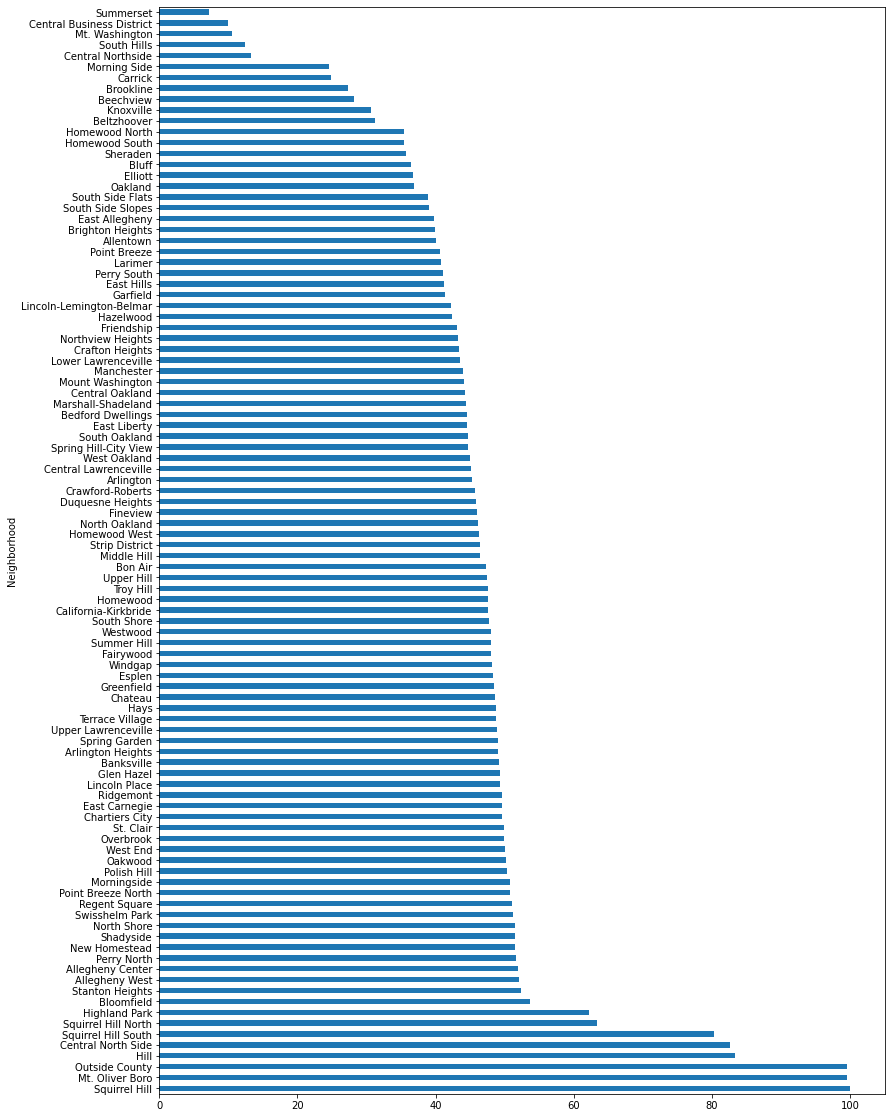

In [37]:
# Combined Metric
nugget =pd.concat([gf,fg, gfg], axis=0)
nug = nugget.groupby("Neighborhood").mean()
nugs = nug.sort_values(by=['Rating'], ascending=False)


# Get rid of redundant neighborhoods
nuggs = nugs.drop(['Mt. Oliver', "Mount Oliver", "Outside City", "Outside State"])

# Print out Dataframe and Visualization
print(nuggs)              
print(nuggs.plot(kind='barh', figsize=(13,20), legend=False))

**Conclusions:**<br>
John Segebart: I am not suprised to see Squirrel Hill winning the title of best neighborhood. They had such a big lead in my trees dataset where it was basically an outlier. It is nice to see that neighborhoods that do not revolve around parks such as Outside County and Mt. Oliver Boro get really close to Squirrel Hill though. It is pretty interesting that all of our visualization for our own datasets and combined datasets exhibit a logarithmic curve. It made sense for my personal set since neighborhoods that are based parks (Pittsburgh having very few of them) are going to have way more trees then urban areas. My dataset was very prone to outliers in this case and apparently so were the other datasets.